In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.dates as mdates
import numpy as np
from collections import Counter

#CRASH_PATH = '/home/josejm/UNIVERSIDAD/SIT/transportes/ITS_Primero/HSIS 2006 crash data.xlsx'
#OCC_PATH = '/home/josejm/UNIVERSIDAD/SIT/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/occ/'
#SPEED_PATH = '/home/josejm/UNIVERSIDAD/SIT/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/speed/'

CRASH_PATH = '/home/josejm/transportes/ITS_Primero/HSIS 2006 crash data.xlsx'
OCC_PATH = '/home/josejm/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/occ/'
SPEED_PATH = '/home/josejm/transportes/ITS_Primero/N. Aquatic Park_downstream_PM_5.25/speed/'

# Load accidents

In [3]:
crash = pd.read_excel(CRASH_PATH)
crash.acc_date = pd.to_datetime(crash.acc_date, format="%Y%m%d")
crash.caseno = crash.caseno.map(lambda item: pd.to_datetime(item[:12],format="%Y%m%d%H%M", errors='coerce' ))
crash.head()

,,cnty_rte,milepost,rodwycls,caseno,rte_nbr,weekday,cause1,acctype,hwy_grp,...,rd_def1,rd_def2,light,trk_flg,distance,accyr,acc_date,numvehs,Unnamed: 33,Unnamed: 34
0,14973,04080 07 D,0.00,1,2006-08-11 12:10:00,80,5,6,B,D,...,H,-,A,NaN,1300.0,2006,2006-08-11,2,NaN,NaN
1,23713,04080 07 D,0.00,1,2006-12-15 16:30:00,80,5,6,C,D,...,H,-,A,NaN,1150.0,2006,2006-12-15,2,NaN,NaN
2,17401,04080 48 D,0.01,1,2006-09-17 11:30:00,80,7,5,C,D,...,H,-,A,NaN,10.0,2006,2006-09-17,2,NaN,NaN
3,16001,04080 48 D,0.02,1,2006-08-26 17:45:00,80,6,5,C,D,...,H,-,A,NaN,100.0,2006,2006-08-26,2,NaN,159.0
4,16783,04080 07 D,0.02,1,2006-09-07 17:55:00,80,4,5,C,D,...,H,-,A,NaN,1056.0,2006,2006-09-07,4,NaN,NaN


In [4]:
crash.columns

Index([' ', 'cnty_rte', 'milepost', 'rodwycls', 'caseno', 'rte_nbr', 'weekday',
       'cause1', 'acctype', 'hwy_grp', 'county', 'tot_kill', 'tot_inj', 'hour',
       'pop_grp', 'locatn', 'inter', 'weather1', 'weather2', 'loc_typ',
       'int_rmp', 'towaway', 'severity', 'veh_invl', 'rdsurf', 'rd_def1',
       'rd_def2', 'light', 'trk_flg', 'distance', 'accyr', 'acc_date',
       'numvehs', 'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')

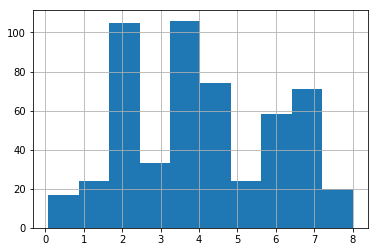

In [5]:
 crash[(crash.rte_nbr == 80) & (crash.county == 1)].milepost.hist()

In [6]:
zone_crash = crash[(crash.milepost > 3.8) & (crash.milepost < 8) & (crash.rte_nbr == 80) & (crash.county == 1)]

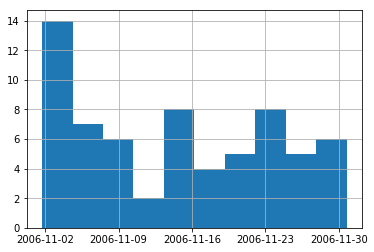

In [7]:
zone_crash = zone_crash[(zone_crash.caseno > datetime.datetime(2006, 11, 1)) & (zone_crash.caseno < datetime.datetime(2006, 12, 1))]
zone_crash.caseno.hist()

# Load speed, flow and occ (only november)

In [8]:
def read_month_occ(month):
    path_month = os.path.join(OCC_PATH, month)
    month_list = [pd.read_table(os.path.join(path_month, week)) for week in os.listdir(path_month)]
    month = pd.concat(month_list)
    month.columns=['date', 'L1_flow', 'L1_occ', 'L2_flow', 'L2_occ','L3_flow', 'L3_occ','L4_flow', 'L4_occ', 'L5_flow', 'L5_occ', 'flow', 'occ', 'lanes', 'observed']
    month.date = pd.to_datetime(month.date)
    return month

"""
m_occ = {}
m_occ['August'] = read_month_occ('August')
m_occ['September'] = read_month_occ('September')
m_occ['October']  = read_month_occ('October')
m_occ['November']  = read_month_occ('November')
m_occ['December']  = read_month_occ('December')

frames = [m_occ['August'], m_occ['September'], m_occ['October'], m_occ['November'], m_occ['December']]
occ = pd.concat(frames)
occ
"""
occ = read_month_occ('November')
occ

,date,L1_flow,L1_occ,L2_flow,L2_occ,L3_flow,L3_occ,L4_flow,L4_occ,L5_flow,L5_occ,flow,occ,lanes,observed
0,2006-11-29 00:00:00,7.0,0.9,11.0,1.4,11.0,1.3,11.0,1.3,10.0,1.6,50.0,1.3,5,100.0
1,2006-11-29 00:05:00,5.0,0.6,11.0,1.1,10.0,1.3,5.0,1.1,4.0,1.0,35.0,1.0,5,100.0
2,2006-11-29 00:10:00,7.0,0.7,15.0,1.9,15.0,1.7,12.0,2.3,7.0,1.3,56.0,1.6,5,100.0
3,2006-11-29 00:15:00,5.0,0.5,11.0,1.3,11.0,1.6,11.0,2.2,7.0,1.1,45.0,1.4,5,100.0
4,2006-11-29 00:20:00,8.0,0.8,13.0,1.7,11.0,2.0,9.0,1.7,10.0,1.7,51.0,1.6,5,100.0
5,2006-11-29 00:25:00,5.0,0.5,14.0,1.7,10.0,1.5,14.0,2.2,9.0,1.5,52.0,1.5,5,100.0
6,2006-11-29 00:30:00,5.0,0.6,15.0,1.9,13.0,2.0,11.0,1.9,8.0,1.3,52.0,1.6,5,100.0
7,2006-11-29 00:35:00,5.0,0.5,13.0,1.4,11.0,1.5,9.0,1.9,6.0,0.7,44.0,1.2,5,100.0
8,2006-11-29 00:40:00,5.0,0.5,11.0,1.5,12.0,1.6,9.0,1.7,9.0,1.9,46.0,1.4,5,100.0
9,2006-11-29 00:45:00,1.0,0.1,6.0,0.7,5.0,0.5,7.0,1.9,6.0,1.2,25.0,0.9,5,100.0


In [9]:
def read_month_speed(month):
    path_month = os.path.join(SPEED_PATH, month)
    month_list = [pd.read_table(os.path.join(path_month, week)) for week in os.listdir(path_month) if week != '.DS_Store']
    month = pd.concat(month_list)
    month.columns=['date', 'L1_flow', 'L1_speed', 'L2_flow', 'L2_speed','L3_flow', 'L3_speed','L4_flow', 'L4_speed', 'L5_flow', 'L5_speed', 'flow', 'speed', 'lanes', 'observed']
    month.date = pd.to_datetime(month.date)
    return month
"""
m_speed = {}
m_speed['August'] = read_month_speed('August')
m_speed['September'] = read_month_speed('September')
m_speed['October']  = read_month_speed('October')
m_speed['November']  = read_month_speed('November')
m_speed['December']  = read_month_speed('December')

frames = [m_speed['August'], m_speed['September'], m_speed['October'], m_speed['November'], m_speed['December']]
speed = pd.concat(frames)
speed
"""
speed = read_month_speed('November')
speed

,date,L1_flow,L1_speed,L2_flow,L2_speed,L3_flow,L3_speed,L4_flow,L4_speed,L5_flow,L5_speed,flow,speed,lanes,observed
0,2006-11-29 00:00:00,7.0,76.5,11.0,74.0,11.0,72.0,11.0,69.2,10.0,64.5,50.0,71.0,5,100.0
1,2006-11-29 00:05:00,5.0,76.3,11.0,74.6,10.0,72.5,5.0,68.7,4.0,63.6,35.0,72.1,5,100.0
2,2006-11-29 00:10:00,7.0,76.6,15.0,73.8,15.0,74.4,12.0,68.1,7.0,63.8,56.0,71.8,5,100.0
3,2006-11-29 00:15:00,5.0,76.5,11.0,73.8,11.0,73.2,11.0,67.2,7.0,64.5,45.0,70.9,5,100.0
4,2006-11-29 00:20:00,8.0,76.6,13.0,73.3,11.0,70.4,9.0,67.6,10.0,64.6,51.0,70.5,5,100.0
5,2006-11-29 00:25:00,5.0,76.5,14.0,73.6,10.0,71.2,14.0,70.1,9.0,64.5,52.0,70.9,5,100.0
6,2006-11-29 00:30:00,5.0,76.3,15.0,72.9,13.0,71.0,11.0,69.8,8.0,64.8,52.0,70.8,5,100.0
7,2006-11-29 00:35:00,5.0,76.4,13.0,74.0,11.0,72.0,9.0,67.8,6.0,65.5,44.0,71.3,5,100.0
8,2006-11-29 00:40:00,5.0,76.4,11.0,73.0,12.0,72.6,9.0,68.2,9.0,63.5,46.0,70.5,5,100.0
9,2006-11-29 00:45:00,1.0,76.8,6.0,73.4,5.0,72.9,7.0,65.6,6.0,63.4,25.0,68.9,5,100.0


## Calculo la distancia entre vehículos

In [121]:
#DISTANCIA ENTRE VEHICULOS

# espacio sin ocupar / numero de vehiculos (longitud 5)
for i in range(1,6):
    occ['L{}_distance'.format(i)] = ( 503 * (1-(occ['L{}_occ'.format(i)]/100)) ) / ( (occ['L{}_occ'.format(i)]/100)*503/5 )
    occ['L{}_distance'.format(i)] = occ['L{}_distance'.format(i)].replace(np.inf, 500)
occ['distance'] = ( 503 * (1-(occ['occ']/100)) ) / ( (occ['occ']/100)*503/5 )
occ['distance'] = occ['distance'].replace(np.inf, 500)


## Ocupación media por laborable/hora

In [122]:
#dayweekdict = {0: 'L', 1: 'M', 2: 'X', 3: 'J', 4: 'V', 5: 'S', 6: 'D'}
dayweekdict = {0: 'W', 1: 'W', 2: 'W', 3: 'W', 4: 'W', 5: 'N', 6: 'N'} # W -> laborable, N -> no laborable
occ['weekday'] = occ.date.map(lambda d: dayweekdict[d.weekday()])
occ['hour'] = occ.date.map(lambda d: datetime.time(d.hour, d.minute))
occ_mean = occ.groupby(['hour', 'weekday'], as_index=False).mean()
occ_mean

,hour,weekday,L1_flow,L1_occ,L2_flow,L2_occ,L3_flow,L3_occ,L4_flow,L4_occ,...,flow,occ,lanes,observed,L1_distance,L2_distance,L3_distance,L4_distance,L5_distance,distance
0,00:00:00,N,13.250000,1.550000,22.625000,2.850000,22.125000,2.987500,22.875000,3.362500,...,101.250000,2.787500,5,100.000000,363.134584,179.319132,168.510732,148.255844,157.747287,181.065642
1,00:00:00,W,7.136364,0.818182,15.590909,1.950000,14.318182,2.104545,13.727273,2.486364,...,62.136364,1.890909,5,95.454545,760.536009,271.664541,243.052024,210.281000,265.371728,271.187269
2,00:05:00,N,13.750000,1.637500,22.375000,2.837500,22.000000,3.100000,21.500000,3.250000,...,99.250000,2.775000,5,100.000000,338.631629,178.712179,161.493574,154.564665,161.788361,180.446236
3,00:05:00,W,6.636364,0.800000,14.409091,1.872727,15.681818,2.277273,13.045455,2.390909,...,59.954545,1.813636,5,95.454545,743.060967,278.052602,231.241869,232.983605,303.494930,287.667964
4,00:10:00,N,14.125000,1.712500,22.875000,2.950000,22.125000,3.037500,22.750000,3.275000,...,101.000000,2.775000,5,100.000000,298.009974,165.935134,161.352014,148.493364,169.624947,176.379020
5,00:10:00,W,6.727273,0.745455,13.818182,1.718182,13.045455,1.854545,13.272727,2.281818,...,57.136364,1.650000,5,95.454545,1015.919713,330.852575,302.448589,259.852413,334.183743,341.806605
6,00:15:00,N,13.500000,1.687500,22.750000,2.912500,21.500000,2.950000,21.875000,3.262500,...,98.000000,2.712500,5,100.000000,310.930240,174.922779,172.655387,151.807411,183.939548,185.234810
7,00:15:00,W,6.045455,0.663636,13.181818,1.681818,13.954545,2.000000,12.636364,2.231818,...,56.272727,1.659091,5,95.454545,951.657387,314.809727,258.111580,239.886793,320.649147,313.577046
8,00:20:00,N,14.250000,1.750000,21.250000,2.700000,20.625000,2.987500,20.875000,3.212500,...,94.625000,2.662500,5,100.000000,307.597719,186.093772,168.318387,156.472046,194.909704,189.135482
9,00:20:00,W,5.772727,0.672727,12.909091,1.604545,12.681818,1.900000,11.590909,1.990909,...,52.227273,1.577273,5,95.454545,1048.059723,332.454464,279.894546,268.000348,341.921867,335.745039


## Velocidad media por laborable/hora

In [11]:
#dayweekdict = {0: 'L', 1: 'M', 2: 'X', 3: 'J', 4: 'V', 5: 'S', 6: 'D'}
dayweekdict = {0: 'W', 1: 'W', 2: 'W', 3: 'W', 4: 'W', 5: 'N', 6: 'N'}
speed['weekday'] = speed.date.map(lambda d: dayweekdict[d.weekday()])
speed['hour'] = speed.date.map(lambda d: datetime.time(d.hour, d.minute))
speed_mean = speed.groupby(['hour', 'weekday'], as_index=False).mean()
speed_mean

,hour,weekday,L1_flow,L1_speed,L2_flow,L2_speed,L3_flow,L3_speed,L4_flow,L4_speed,L5_flow,L5_speed,flow,speed,lanes,observed
0,00:00:00,N,13.250000,76.500000,22.625000,74.000000,22.125000,72.000000,22.875000,69.200000,20.375000,64.500000,101.250000,70.850000,5,100.000000
1,00:00:00,W,7.136364,76.500000,15.590909,74.000000,14.318182,72.000000,13.727273,69.200000,11.363636,64.500000,62.136364,71.018182,5,95.454545
2,00:05:00,N,13.750000,75.900000,22.375000,73.525000,22.000000,71.450000,21.500000,69.212500,19.625000,63.937500,99.250000,70.525000,5,100.000000
3,00:05:00,W,6.636364,76.227273,14.409091,72.972727,15.681818,71.436364,13.045455,68.704545,10.181818,64.536364,59.954545,70.568182,5,95.454545
4,00:10:00,N,14.125000,75.637500,22.875000,72.862500,22.125000,71.987500,22.750000,70.325000,19.125000,64.037500,101.000000,70.800000,5,100.000000
5,00:10:00,W,6.727273,76.295455,13.818182,73.013636,13.045455,71.531818,13.272727,69.809091,10.272727,64.690909,57.136364,70.750000,5,95.454545
6,00:15:00,N,13.500000,75.225000,22.750000,72.925000,21.500000,72.237500,21.875000,70.062500,18.375000,64.087500,98.000000,70.762500,5,100.000000
7,00:15:00,W,6.045455,76.313636,13.181818,72.731818,13.954545,71.540909,12.636364,69.572727,10.454545,64.904545,56.272727,70.654545,5,95.454545
8,00:20:00,N,14.250000,75.025000,21.250000,72.962500,20.625000,71.087500,20.875000,68.962500,17.625000,64.337500,94.625000,70.362500,5,100.000000
9,00:20:00,W,5.772727,76.227273,12.909091,72.904545,12.681818,71.100000,11.590909,69.831818,9.272727,64.550000,52.227273,70.700000,5,95.454545


### Obtener los gráficos de flujo, velocidad y ocupación
No dejo las gráficas debido a la cantidad que son y a continuación selecciono algunas de las más relevantes para estudiarlas con detalle

In [10]:
hour = mdates.HourLocator()
minute = mdates.MinuteLocator(interval=10)
fmt = mdates.DateFormatter('%H:%M')
plt.rc('figure', figsize=(14, 8))


for index, row in zone_crash.sort_values('caseno').iterrows():
    plt.figure()
    from_h = row.caseno - datetime.timedelta(hours=2)
    to_h = row.caseno + datetime.timedelta(hours=2)
    out = occ[(occ.date > from_h) & (occ.date < to_h)]
    out.date.sort_values()
    out_s = speed[(speed.date > from_h) & (speed.date < to_h)]
    out_s.date.sort_values()
    
    print("dia: {}, veh_inv: {}, severidad: {}, heridos: {}, muertos: {}, milla: {}, cause: {}, tipo: {}, tiempo1: {}, tiempo2: {}"
          .format(row.caseno, row.numvehs, row.severity, row.tot_inj, row.tot_kill, row.milepost, row.cause1,
            row.acctype, row.weather1, row.weather2)) #cause1, acctype
    
    ax = plt.subplot(221)
    plt.plot(out.date, out.L1_flow)
    plt.plot(out.date, out.L2_flow)
    plt.plot(out.date, out.L3_flow)
    plt.plot(out.date, out.L4_flow)
    plt.plot(out.date, out.L5_flow)
    plt.legend()
    plt.ylim(0,70)
    plt.title('flow')
    ax.xaxis.set_major_locator(hour)
    ax.xaxis.set_minor_locator(minute)
    ax.xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    
    
    ax = plt.subplot(222)
    plt.plot(out.date, out.L1_occ)
    plt.plot(out.date, out.L2_occ)
    plt.plot(out.date, out.L3_occ)
    plt.plot(out.date, out.L4_occ)
    plt.plot(out.date, out.L5_occ)
    plt.legend()
    plt.title('occ')
    plt.ylim(0,40)
    ax.xaxis.set_major_locator(hour)
    ax.xaxis.set_minor_locator(minute)
    ax.xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    
    ax = plt.subplot(212)
    plt.plot(out.date, out_s.L1_speed)
    plt.plot(out.date, out_s.L2_speed)
    plt.plot(out.date, out_s.L3_speed)
    plt.plot(out.date, out_s.L4_speed)
    plt.plot(out.date, out_s.L5_speed)
    plt.legend()
    plt.title('speed')
    plt.ylim(0,80)
    ax.xaxis.set_major_locator(hour)
    ax.xaxis.set_minor_locator(minute)
    ax.xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    plt.show()

    #print(row.caseno.hour)
    #print(row.caseno.minute)


'\nfor index, row in zone_crash.sort_values(\'caseno\').iterrows():\n    plt.figure()\n    from_h = row.caseno - datetime.timedelta(hours=2)\n    to_h = row.caseno + datetime.timedelta(hours=2)\n    out = occ[(occ.date > from_h) & (occ.date < to_h)]\n    out.date.sort_values()\n    out_s = speed[(speed.date > from_h) & (speed.date < to_h)]\n    out_s.date.sort_values()\n    \n    print("dia: {}, veh_inv: {}, severidad: {}, heridos: {}, muertos: {}, milla: {}, cause: {}, tipo: {}, tiempo1: {}, tiempo2: {}"\n          .format(row.caseno, row.numvehs, row.severity, row.tot_inj, row.tot_kill, row.milepost, row.cause1,\n            row.acctype, row.weather1, row.weather2)) #cause1, acctype\n    \n    ax = plt.subplot(221)\n    plt.plot(out.date, out.L1_flow)\n    plt.plot(out.date, out.L2_flow)\n    plt.plot(out.date, out.L3_flow)\n    plt.plot(out.date, out.L4_flow)\n    plt.plot(out.date, out.L5_flow)\n    plt.legend()\n    plt.ylim(0,70)\n    plt.title(\'flow\')\n    ax.xaxis.set_major_l

## Datos de los accidentes más destacados o con relevancia de noviembre
- dia: 2006-11-01 17:00:00, veh_inv: 3, severidad: 0, heridos: 0, muertos: 0, milla: 6.03, cause: 6, tipo: C, tiempo1: B, tiempo2: -

dia: 2006-11-01 19:04:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 3.85, cause: 5, tipo: C, tiempo1: B, tiempo2: -



- dia: 2006-11-02 08:09:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 7.0840000000000005, cause: 4, tipo: B, tiempo1: B, tiempo2: -

dia: 2006-11-02 18:15:00, veh_inv: 3, severidad: 0, heridos: 0, muertos: 0, milla: 6.91, cause: 5, tipo: C, tiempo1: B, tiempo2: C



- dia: 2006-11-03 05:47:00, veh_inv: 2, severidad: 3, heridos: 1, muertos: 0, milla: 3.88, cause: 4, tipo: F, tiempo1: B, tiempo2: -

dia: 2006-11-03 18:35:00, veh_inv: 2, severidad: 4, heridos: 1, muertos: 0, milla: 6.1000000000000005, cause: 5, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-03 18:59:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.140000000000001, cause: 5, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-03 19:00:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 5.54, cause: 6, tipo: B, tiempo1: A, tiempo2: -


- dia: 2006-11-04 13:20:00, veh_inv: 2, severidad: 3, heridos: 3, muertos: 0, milla: 3.85, cause: 6, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-04 13:50:00, veh_inv: 3, severidad: 0, heridos: 0, muertos: 0, milla: 5.46, cause: 5, tipo: C, tiempo1: A, tiempo2: -


- dia: 2006-11-07 17:40:00, veh_inv: 3, severidad: 4, heridos: 1, muertos: 0, milla: 4.7700000000000005, cause: 5, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-07 18:20:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 5.66, cause: B, tipo: B, tiempo1: A, tiempo2: -


- dia: 2006-11-09 10:45:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 4.39, cause: 5, tipo: C, tiempo1: A, tiempo2: -


- dia: 2006-11-10 15:00:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 5.8100000000000005, cause: 5, tipo: C, tiempo1: A, tiempo2: -


- dia: 2006-11-14 15:20:00, veh_inv: 1, severidad: 3, heridos: 1, muertos: 0, milla: 7.07, cause: 4, tipo: E, tiempo1: A, tiempo2: -

dia: 2006-11-14 15:25:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.54, cause: 6, tipo: B, tiempo1: A, tiempo2: -

dia: 2006-11-14 15:45:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.0600000000000005, cause: 5, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-14 16:10:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.8100000000000005, cause: 5, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-14 16:50:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.53, cause: 5, tipo: C, tiempo1: A, tiempo2: 


- dia: 2006-11-18 14:50:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 4.7700000000000005, cause: 5, tipo: C, tiempo1: A, tiempo2: - (NO REGISTRADO)


- dia: 2006-11-22 16:00:00, veh_inv: 4, severidad: 0, heridos: 0, muertos: 0, milla: 4.59, cause: 5, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-22 17:25:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.42, cause: 5, tipo: C, tiempo1: A, tiempo2: -


- dia: 2006-11-26 17:33:00, veh_inv: 2, severidad: 4, heridos: 1, muertos: 0, milla: 6.479, cause: 3, tipo: D, tiempo1: C, tiempo2: -


- dia: 2006-11-30 16:50:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 5.87, cause: 5, tipo: C, tiempo1: A, tiempo2: -

dia: 2006-11-30 17:20:00, veh_inv: 4, severidad: 3, heridos: 2, muertos: 0, milla: 4.0, cause: 5, tipo: C, tiempo1: A, tiempo2: -


In [12]:
dates = ["2006-11-01 17:00:00", "2006-11-01 19:04:00", "2006-11-02 08:09:00", "2006-11-02 18:15:00", "2006-11-03 05:47:00", "2006-11-03 18:35:00", "2006-11-03 18:59:00", "2006-11-03 19:00:00", "2006-11-04 13:20:00", "2006-11-04 13:50:00", "2006-11-07 17:40:00", "2006-11-07 18:20:00", "2006-11-09 10:45:00", "2006-11-10 15:00:00", "2006-11-14 15:20:00", "2006-11-14 15:25:00", "2006-11-14 15:45:00", "2006-11-14 16:10:00", "2006-11-14 16:50:00", "2006-11-18 14:50:00", "2006-11-22 16:00:00", "2006-11-22 17:25:00", "2006-11-26 17:33:00", "2006-11-30 16:50:00", "2006-11-30 17:20:00"]
dates_dt = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in dates]
crash_filt = zone_crash[zone_crash['caseno'].isin(dates_dt)]

In [123]:
"""
Función para imprimir los conjuntos de accidentes
"""

hour = mdates.HourLocator()
minute = mdates.MinuteLocator(interval=10)
fmt = mdates.DateFormatter('%H:%M')
plt.rc('figure', figsize=(14, 8))

causes = {
'1': 'UNDER INFLUENCE OF ALCOHOL',
'2': 'FOLLOWING TOO CLOSELY',
'3': 'FAILURE TO YIELD',
'4': 'IMPROPER TURN',
'5': 'SPEEDING',
'6': 'OTHER VIOLATIONS (HAZARDOUS)',
'B': 'OTHER IMPROPER DRIVING',
'C': 'OTHER THAN DRIVING',
'D': 'UNKNOWN',
'E': 'FELL ASLEEP',
'<': 'NOT STATED',
'-': 'INVALID CODE',
}

weather = {
'A': 'CLEAR',
'B': 'CLOUDY',
'C': 'RAINING',
'D': 'SNOWING',
'E': 'FOG',
'F': 'OTHER',
'G': 'WIND',
'<': 'NOT STATED',
'-': 'UNKNOWN'
}

acc_type = {
'A': 'HEAD-ON',
'B': 'SIDESWIPE',
'C': 'REAR END',
'D': 'BROADSIDE',
'E': 'HIT OBJECT',
'F': 'OVERTURNED',
'G': 'AUTO-PEDESTRIAN',
'H': 'OTHER',
'<': 'NOT STATED',
'OTHER:': 'ERROR/OTHER CODES',
'-': 'UNKNOWN'
}
#occ and speed from global scope
def plot_accidents(rows):
    #print (row)
    plt.figure()
    from_h = min(rows.caseno) - datetime.timedelta(hours=1.5)
    to_h = max(rows.caseno) + datetime.timedelta(hours=1.5)
    #from_h = row.caseno - datetime.timedelta(hours=2)
    #to_h = row.caseno + datetime.timedelta(hours=2)
    
    #ocupacion y velocidad en ese tramo
    out = occ[(occ.date > from_h) & (occ.date < to_h)]
    out.date.sort_values()
    out_s = speed[(speed.date > from_h) & (speed.date < to_h)]
    out_s.date.sort_values()
    
    # ocupacion y velocidad media del mes en ese tramo
    minhour = datetime.time(from_h.hour, from_h.minute)
    maxhour = datetime.time(to_h.hour, to_h.minute)
    occ_mn = occ_mean[(occ_mean.weekday == 'W') & (occ_mean.hour > minhour) & (occ_mean.hour < maxhour)].sort_values('hour')
    speed_mn = speed_mean[(speed_mean.weekday == 'W') & (speed_mean.hour > minhour) & (speed_mean.hour < maxhour)].sort_values('hour')
    

    
    # INFO SOBRE LOS ACCIDENTES
    for i, row in rows.iterrows():
        print("dia: {}, veh_inv: {}, severidad: {}, heridos: {}, muertos: {}, milla: {}, cause: {}, tipo: {}, tiempo1: {}, tiempo2: {}"
          .format(row.caseno, row.numvehs, row.severity, row.tot_inj, row.tot_kill, row.milepost, causes[row.cause1],
            acc_type[row.acctype], weather[row.weather1], weather[row.weather2])) #cause1, acctype
    
    # PLOT FLOW
    ax = plt.subplot(221)
    plt.plot(out.date, out.L1_flow)
    plt.plot(out.date, out.L2_flow)
    plt.plot(out.date, out.L3_flow)
    plt.plot(out.date, out.L4_flow)
    plt.plot(out.date, out.L5_flow)
    plt.plot(out.date, speed_mn.flow/5, 'b', linewidth=2.0)
    for i, r in rows.iterrows():
        ax.annotate('accidente', xy=(r.caseno, 10), arrowprops=dict(facecolor='grey', shrink=0.1))
    plt.legend()
    plt.ylim(0,70)
    plt.title('flow')
    ax.xaxis.set_major_locator(hour)
    ax.xaxis.set_minor_locator(minute)
    ax.xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    
    # PLOT OCUPACION
    ax = plt.subplot(222)
    plt.plot(out.date, out.L1_occ)
    plt.plot(out.date, out.L2_occ)
    plt.plot(out.date, out.L3_occ)
    plt.plot(out.date, out.L4_occ)
    plt.plot(out.date, out.L5_occ)
    plt.plot(out.date, occ_mn.occ, 'b', linewidth=2.0)
    for i, r in rows.iterrows():
        ax.annotate('accidente', xy=(r.caseno, 10), arrowprops=dict(facecolor='grey', shrink=0.1))
    plt.legend()
    plt.title('occ')
    plt.ylim(0,40)
    ax.xaxis.set_major_locator(hour)
    ax.xaxis.set_minor_locator(minute)
    ax.xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    
    # PLOT VELOCIDAD
    ax = plt.subplot(223)
    plt.plot(out.date, out_s.L1_speed)
    plt.plot(out.date, out_s.L2_speed)
    plt.plot(out.date, out_s.L3_speed)
    plt.plot(out.date, out_s.L4_speed)
    plt.plot(out.date, out_s.L5_speed)
    plt.plot(out.date, speed_mn.speed, 'b', linewidth=2.0)
    for i, r in rows.iterrows():
        ax.annotate('accidente', xy=(r.caseno, 10), arrowprops=dict(facecolor='grey', shrink=0.1))
    plt.legend()
    plt.title('speed')
    plt.ylim(0,80)
    ax.xaxis.set_major_locator(hour)
    ax.xaxis.set_minor_locator(minute)
    ax.xaxis.set_major_formatter(fmt)
    plt.tight_layout()
   
    # PLOT DISTANCIA
    ax = plt.subplot(224)
    plt.plot(out.date, out.L1_distance)
    plt.plot(out.date, out.L2_distance)
    plt.plot(out.date, out.L3_distance)
    plt.plot(out.date, out.L4_distance)
    plt.plot(out.date, out.L5_distance)
    plt.plot(out.date, occ_mn.distance, 'b', linewidth=2.0)
    for i, r in rows.iterrows():
        ax.annotate('accidente', xy=(r.caseno, 10), arrowprops=dict(facecolor='grey', shrink=0.1))
    plt.legend()
    plt.title('distance')
    plt.ylabel('m')
    plt.ylim(0,80)
    ax.xaxis.set_major_locator(hour)
    ax.xaxis.set_minor_locator(minute)
    ax.xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    plt.show()
    

# Representación del flujo, ocupación y velocidad en los accidentes

En las siguientes gráficas represento las anteriores variable por carril y LA MEDIA A LO LARGO DEL MES A ESA DETERMINADA HORA para contrastar lo ocurrido ese día con lo que ocurre habitualmente

### Miércoles1 Noviembre
No se visualiza ningún patrón en especial para este accidente entre los carriles, ambos son por alcance, pero si que se observa en el segundo accidente que al estar involucrados 3 vehículos la ocupación se mantiene elevada durante media hora

dia: 2006-11-01 19:04:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 3.85, cause: SPEEDING, tipo: REAR END, tiempo1: CLOUDY, tiempo2: UNKNOWN
dia: 2006-11-01 17:00:00, veh_inv: 3, severidad: 0, heridos: 0, muertos: 0, milla: 6.03, cause: OTHER VIOLATIONS (HAZARDOUS), tipo: REAR END, tiempo1: CLOUDY, tiempo2: UNKNOWN


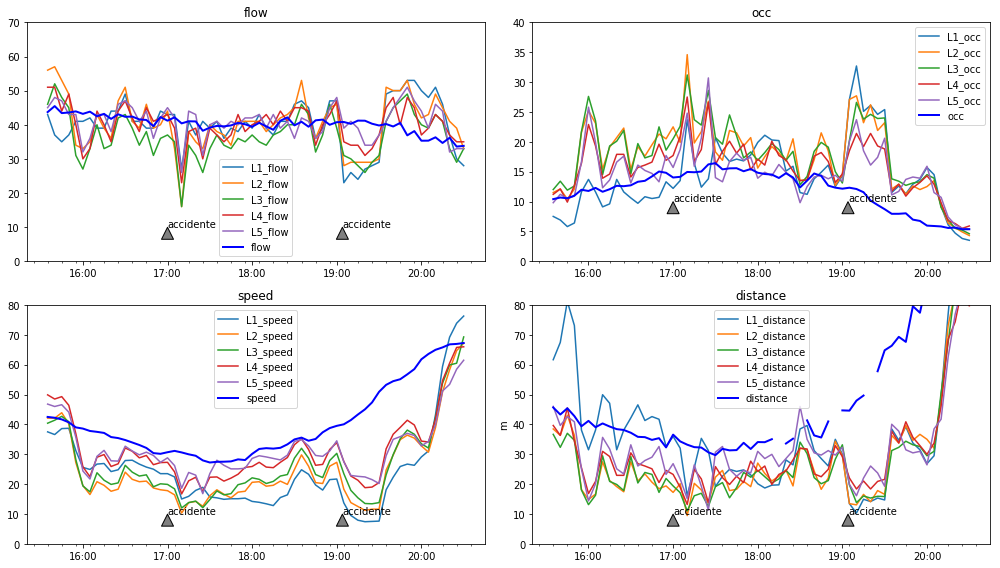

In [124]:
o = crash_filt[crash_filt['caseno'].map(lambda d: d.day == 1)]
plot_accidents(o)

### Jueves 2 de Noviembre
El accidente de las 18:15 parece ser ocurrido en el carril 3, existe alguna fluctuación inicial y a continuación decae el flujo, sobretodo la ocupación aumenta muchísimo (además del carril 2 adyacente)

En el caso del accidente de las 8:09, se debe a un choque lateral. Parece que se ha etiquetado un poco después debido a que el patrón se ve 15 minutos antes. El accidente sucede en el carril 5 (más cercano a las incorporaciones) y se puede ver claramente un patrón en el cual sube el flujo y la ocupación y baja la velocidad

dia: 2006-11-02 18:15:00, veh_inv: 3, severidad: 0, heridos: 0, muertos: 0, milla: 6.91, cause: SPEEDING, tipo: REAR END, tiempo1: CLOUDY, tiempo2: RAINING


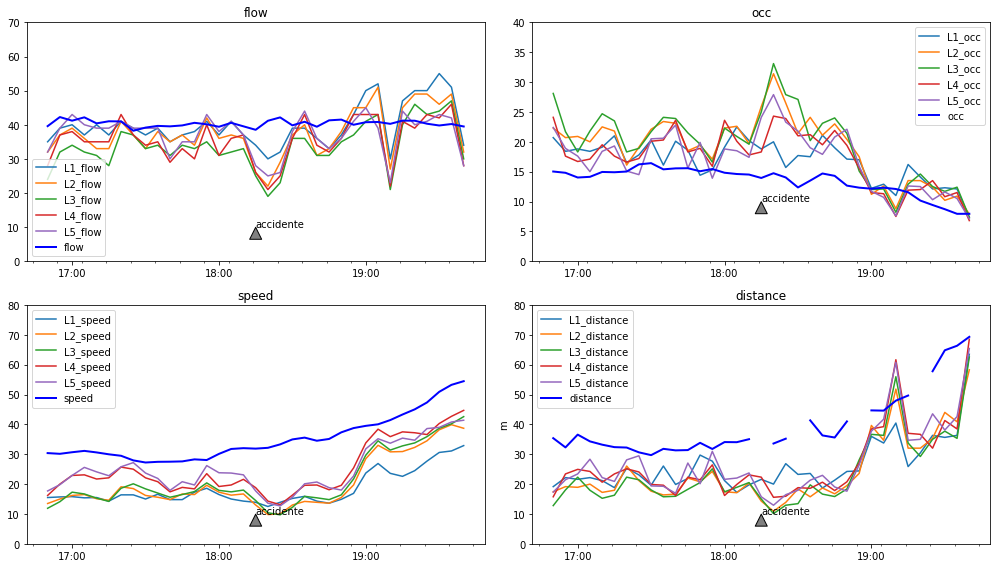

dia: 2006-11-02 08:09:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 7.0840000000000005, cause: IMPROPER TURN, tipo: SIDESWIPE, tiempo1: CLOUDY, tiempo2: UNKNOWN


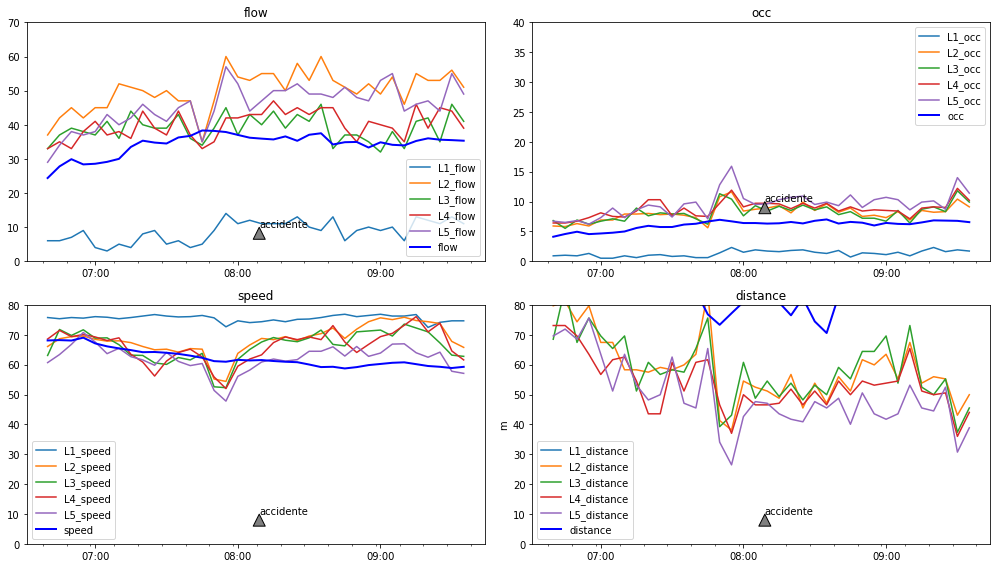

In [125]:
o = crash_filt[crash_filt['caseno'].map(lambda d: d.day == 2 and d.hour == 18)]
plot_accidents(o)
o = crash_filt[crash_filt['caseno'].map(lambda d: d.day == 2 and d.hour == 8)]
plot_accidents(o)

### Viernes 3 de noviembre
Aquí se puede mostrar 3 accidentes consecutivos en un mismo tramo, lo que provoca que la vía se vea afectada durante 1 hora.

El primero de los accidentes (milla 6.1) se debe a un alcance debido a la velocidad. El flujo del carril 2 es el que más perjudicado se vee.

A continuación en la milla 5.54 hay un accidente lateral. Éste puede ser debido a un individuo que estaba cambiando de carril continuamente debido a la congestiónd el primero y parece que afecta sobretodo a los carriles 2 y 3

En el mismo instante de tiempo en la milla 6.14 ocurre otro accidente por velocidad y éste es posiblemente a un frenazo ocasionado por el accidente unas millas más deltante.

dia: 2006-11-03 19:00:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 5.54, cause: OTHER VIOLATIONS (HAZARDOUS), tipo: SIDESWIPE, tiempo1: CLEAR, tiempo2: UNKNOWN
dia: 2006-11-03 18:35:00, veh_inv: 2, severidad: 4, heridos: 1, muertos: 0, milla: 6.1000000000000005, cause: SPEEDING, tipo: REAR END, tiempo1: CLEAR, tiempo2: UNKNOWN
dia: 2006-11-03 18:59:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.140000000000001, cause: SPEEDING, tipo: REAR END, tiempo1: CLEAR, tiempo2: UNKNOWN


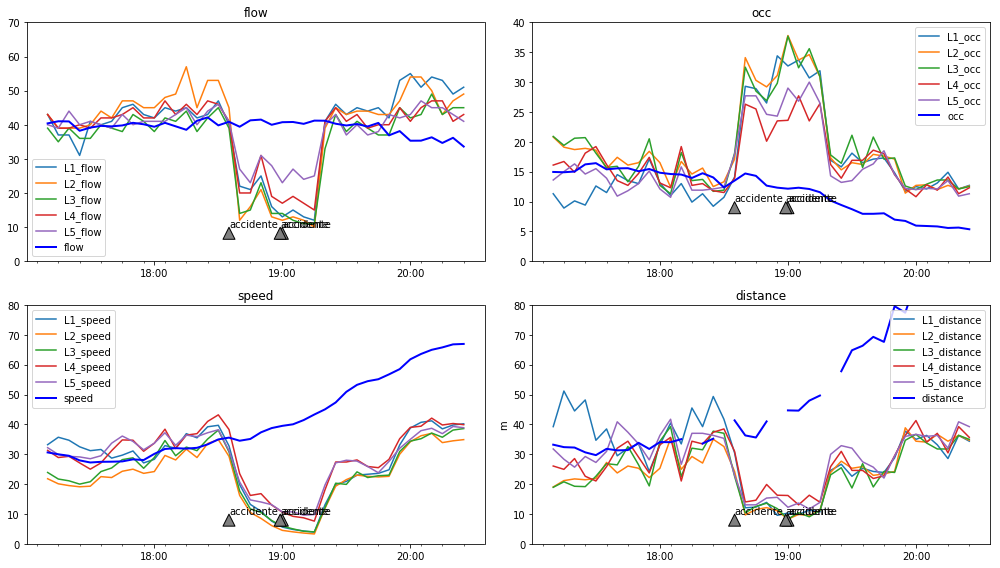

In [126]:
o = crash_filt[crash_filt['caseno'].map(lambda d: d.day == 3 and (d.hour == 19 or d.hour == 18))]
plot_accidents(o)

### Sábado 4 de noviembre
El primero de los accidentes no se muestra cambio en la gráfica debido a que comienza en el principio de la zona de detección y por lo tanto no se puede ver el comportamiento correctamente, pero 30 minutos después aparece un accidente bastante notable en el cual se muestra cómo los cariles 3,4 y 5 bajan su flujo, lo que puede sirnificar que se ha producido en el carril 4 y ha perjudicado a los adyacentes

dia: 2006-11-04 13:20:00, veh_inv: 2, severidad: 3, heridos: 3, muertos: 0, milla: 3.85, cause: OTHER VIOLATIONS (HAZARDOUS), tipo: REAR END, tiempo1: CLEAR, tiempo2: UNKNOWN
dia: 2006-11-04 13:50:00, veh_inv: 3, severidad: 0, heridos: 0, muertos: 0, milla: 5.46, cause: SPEEDING, tipo: REAR END, tiempo1: CLEAR, tiempo2: UNKNOWN


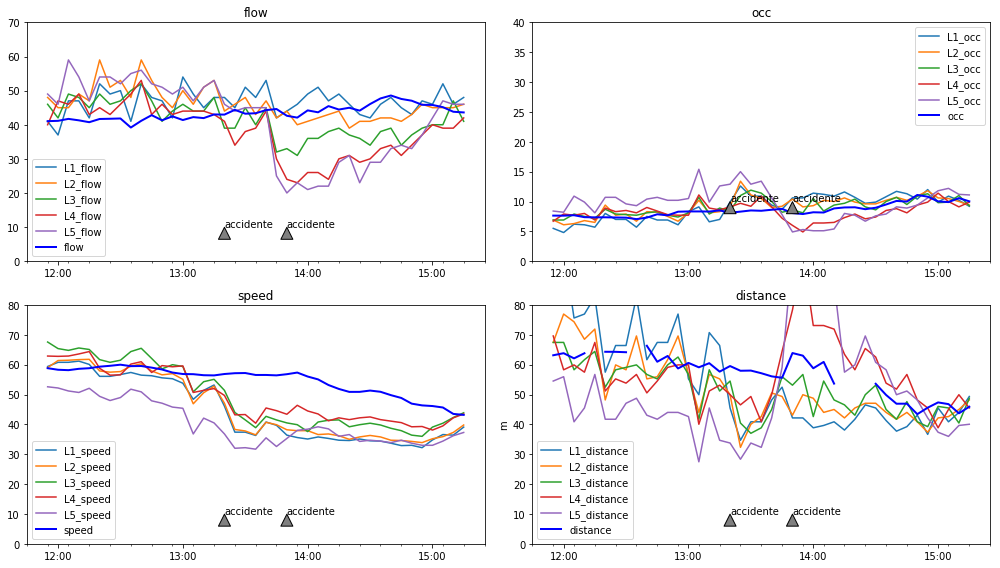

In [127]:
o = crash_filt[crash_filt['caseno'].map(lambda d: d.day == 4)]
plot_accidents(o)

### Martes 14 de noviembre
Este día parece remarcable y he querido mostrar la secuencia de accidentes que ocurren en menos de 2 horas. Todos los accidentes han ocurrido entre las millas 6 y 7, un tramo posterior sobre el que tomamos las medidas.

Aquí se puede ver que en el flujo hay variaciones considerables del flujo y posteriomente hay accidentes por giro indevido y choque contra un objeto en el cual hay 1 herido y un vehículo involucrado, y en el mismo instante de tiempo hay un choque latereal supongo intentando evitar el accidente. En ese momento (supongo unos minutos antes de lo que marca la hora exacta del accidente), baja el flujo del carril VAO (1) y del carril 2 y hay un pico de ocupación.

A lo largo de ese mismo día ocurrirán accidentes por velocidad y por alcance





dia: 2006-11-14 15:45:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.0600000000000005, cause: SPEEDING, tipo: REAR END, tiempo1: CLEAR, tiempo2: UNKNOWN
dia: 2006-11-14 16:50:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.53, cause: SPEEDING, tipo: REAR END, tiempo1: CLEAR, tiempo2: UNKNOWN
dia: 2006-11-14 15:25:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.54, cause: OTHER VIOLATIONS (HAZARDOUS), tipo: SIDESWIPE, tiempo1: CLEAR, tiempo2: UNKNOWN
dia: 2006-11-14 16:10:00, veh_inv: 2, severidad: 0, heridos: 0, muertos: 0, milla: 6.8100000000000005, cause: SPEEDING, tipo: REAR END, tiempo1: CLEAR, tiempo2: UNKNOWN
dia: 2006-11-14 15:20:00, veh_inv: 1, severidad: 3, heridos: 1, muertos: 0, milla: 7.07, cause: IMPROPER TURN, tipo: HIT OBJECT, tiempo1: CLEAR, tiempo2: UNKNOWN


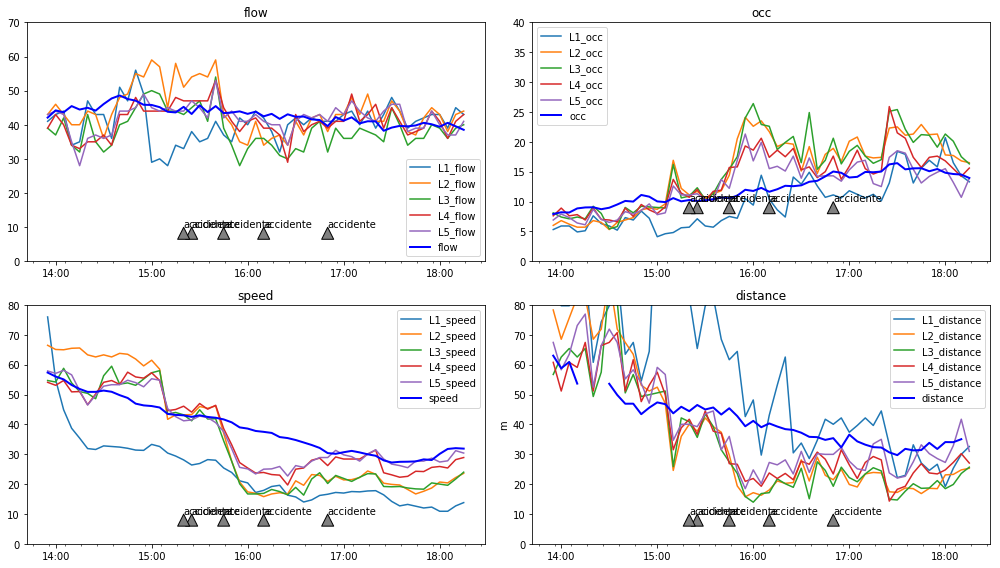

In [128]:
o = crash_filt[crash_filt['caseno'].map(lambda d: d.day == 14)]
plot_accidents(o)

dia: 2006-11-26 17:33:00, veh_inv: 2, severidad: 4, heridos: 1, muertos: 0, milla: 6.479, cause: FAILURE TO YIELD, tipo: BROADSIDE, tiempo1: RAINING, tiempo2: UNKNOWN


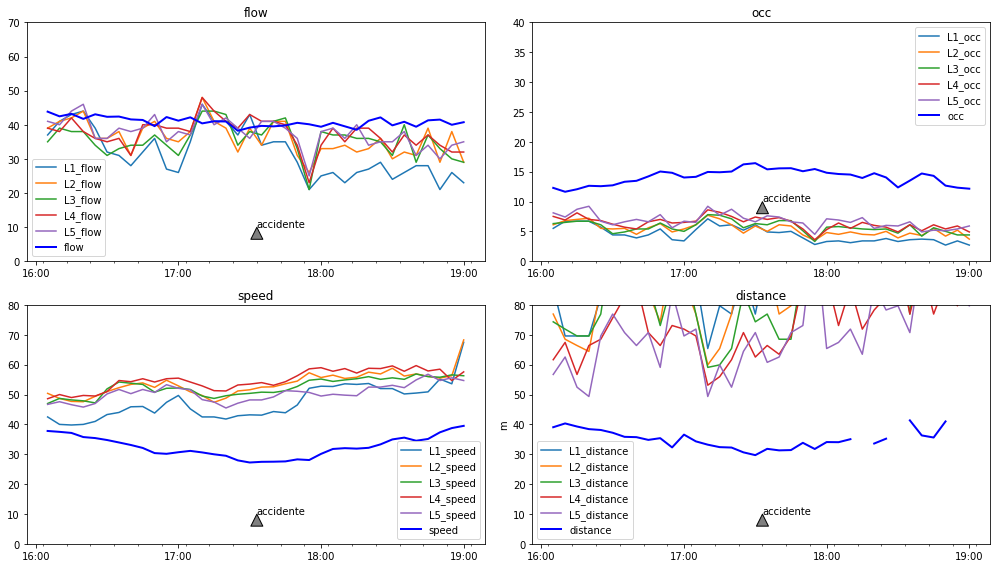

In [129]:
o = crash_filt[crash_filt['caseno'].map(lambda d: d.day == 26)]
plot_accidents(o)